<a href="https://colab.research.google.com/github/palayushi293/pneumania/blob/main/notebook399b86dcff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import kagglehub
paultimothymooney_chest_xray_pneumonia_path = kagglehub.dataset_download('paultimothymooney/chest-xray-pneumonia')

print('Data source import complete.')


100%|██████████| 2.29G/2.29G [00:24<00:00, 101MB/s]

Extracting files...


Data source import complete.


In [2]:

import numpy as np
import pandas as pd

In [3]:
import PIL
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
image=PIL.Image.open('/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg')

In [ ]:
image

In [ ]:
image_n=PIL.Image.open('/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0115-0001.jpeg')

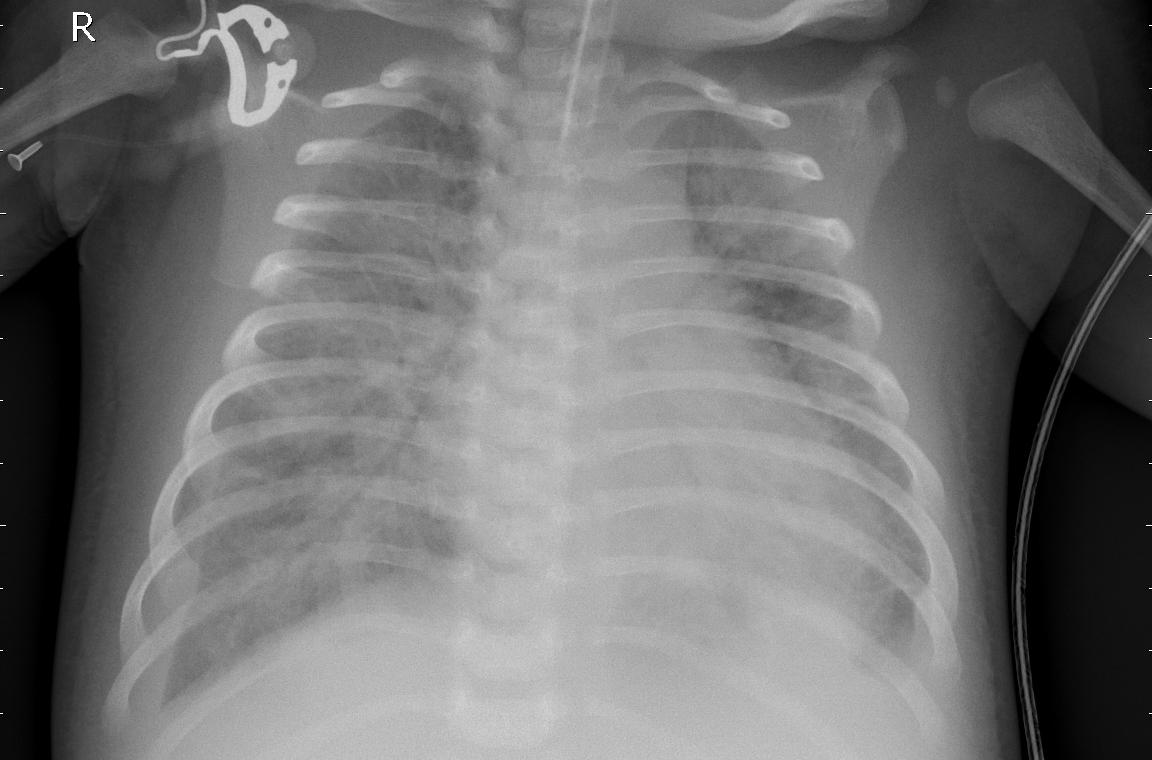

In [ ]:
image

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir='/kaggle/input/chest-xray-pneumonia/chest_xray/train/'

In [ ]:
train_generator=ImageDataGenerator(rescale=1/255)
data_train=train_generator.flow_from_directory(train_dir, target_size=(120, 120), batch_size=32, class_mode='binary')

Found 5216 images belonging to 2 classes.


In [ ]:
valid_dir='/kaggle/input/chest-xray-pneumonia/chest_xray/val/'

In [ ]:
valid_generator=ImageDataGenerator(rescale=1/255)
data_valid=valid_generator.flow_from_directory(valid_dir, target_size=(120, 120), batch_size=32, class_mode='binary')

Found 16 images belonging to 2 classes.


In [ ]:
test_dir='/kaggle/input/chest-xray-pneumonia/chest_xray/test/'
test_generator=ImageDataGenerator(rescale=1/255)
data_test=test_generator.flow_from_directory(test_dir, target_size=(120, 120), batch_size=32, class_mode='binary')

Found 624 images belonging to 2 classes.


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(120, 120, 3)),
    tf.keras.layers.Conv2D(32, (3, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 118, 118, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 59, 59, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 57, 57, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 26, 26, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 11, 11, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │         6,401 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 394,817 (1.51 MB)

 Trainable params: 394,817 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(data_train,epochs=2,validation_data=data_valid)

Epoch 1/2
163/163 ━━━━━━━━━━━━━━━━━━━━ 106s 624ms/step - accuracy: 0.8404 - loss: 0.3385 - val_accuracy: 0.8125 - val_loss: 0.6125
Epoch 2/2
163/163 ━━━━━━━━━━━━━━━━━━━━ 104s 624ms/step - accuracy: 0.9531 - loss: 0.1168 - val_accuracy: 0.8125 - val_loss: 0.3374


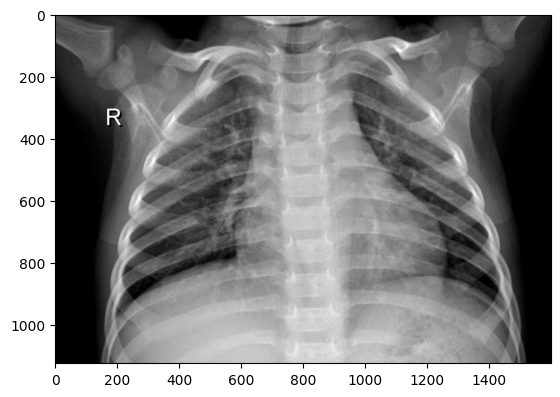

In [ ]:
import cv2
test_im=cv2.imread('/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0125-0001.jpeg')
plt.imshow(test_im)

In [ ]:
test_im.shape

(1125, 1600, 3)

In [ ]:
test_im=cv2.resize(test_im,(120,120))

In [ ]:
test_input=test_im.reshape((1,120,120,3))

In [ ]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[0.]], dtype=float32)